<a href="https://colab.research.google.com/github/JULIANNEBBORGES/CHALLENGE_TELECOM_X_BR-/blob/main/CHALLENGE_TELECOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 Challenge Telecom_X_BR

## 📚 Preparaçao do ambiente:

In [1]:
#Importando as bibliotecas:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
!pip install squarify > /dev/null
import squarify

## 📚 Extração:

In [2]:
# Acessando o dicionário.
# URL para a versão bruta do dicionário
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_dicionario.md"

# Fazer a requisição para obter o texto do dicionário
response = requests.get(url)
dicionario_texto = response.text

# Separar as linhas, removendo a linha específica
dicionario_linhas = dicionario_texto.splitlines()
dicionario_linhas = [linha for linha in dicionario_linhas if linha.strip() != "#### Dicionário de dados"]

dicionario_formatado = "📚 Dicionário de Dados\n" + "\n".join(dicionario_linhas)
print(dicionario_formatado)# Exibir o conteúdo formatado

📚 Dicionário de Dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de contr

In [3]:
# Fazendo a requisição HTTP
# Utilizando a biblioteca requests para acessar a URL da API e obter os dados JSON.
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(url)

In [4]:
# Verificando se a requisição foi bem-sucedida conferindo o status da resposta.
if response.status_code == 200:
    print("Requisição bem-sucedida!")
else:
    print("Erro na requisição:", response.status_code)

Requisição bem-sucedida!


In [5]:
# Extraindo os dados JSON da resposta.
data = response.json()

In [6]:
# Convertendo os dados JSON em um DataFrame do Pandas para facilitar a manipulação dos dados.
df = pd.DataFrame(data)

In [7]:
#  Visualizando o DataFrame para garantir que os dados foram carregados corretamente.
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

> 📚** DADOS ANINHADOS** <br>

>> O retorno acima demosntra que as colunas ('customer', 'phone', 'internet', 'account') contêm dados aninhados - no formato de dicionários ou estruturas JSON dentro de cada célula. <br>
>> Para realizar análises tabulares eficazes, é imprescindível "achatar" ou desaninhar esses dados, transformando as chaves dentro dos dicionários aninhados em colunas separadas no DataFrame principal.<br>
>> Para desaninha-los facilitando a análise utilizou-se a função `[json_normalize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html)` do Pandas, que é ideal para converter dados JSON semi-estruturados em uma tabela plana.

## 📚 Tratamento (estruturação) do processo de ETL:

In [8]:
print ("📚 Desaninhando os dados:")
print()
# 1. Desaninhar a coluna 'customer'
# Esta coluna provavelmente contém detalhes como gender, SeniorCitizen, Partner, Dependents
customer_df = pd.json_normalize(df['customer'])

# 2. Desaninhar a coluna 'phone'
# Esta coluna pode conter informações como MultipleLines, PhoneService
phone_df = pd.json_normalize(df['phone'])

# 3. Desaninhar a coluna 'internet'
# Esta coluna pode conter detalhes sobre tipos de serviço (DSL, Fiber optic) e serviços adicionais
internet_df = pd.json_normalize(df['internet'])

# 4. Desaninhar a coluna 'account'
# Esta coluna pode incluir informações como Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges
account_df = pd.json_normalize(df['account'])

# 5. Selecionar as colunas originais que não estavam aninhadas
# Precisamos manter o identificador principal ('customerID') e a variável alvo ('Churn')
original_cols_df = df[['customerID', 'Churn']]

# 6. Concatenar todos os DataFrames resultantes
# Usamos axis=1 para concatenar colunas lado a lado
final_df = pd.concat([original_cols_df, customer_df, phone_df, internet_df, account_df], axis=1)

# Exibir as primeiras linhas do DataFrame final para verificar o resultado
print(final_df.head())

📚 Desaninhando os dados:

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No  

> 📚 Compreendendo - Processo de Desanimhar:<br><br>

>> `pd.json_normalize`(df['nested_column']):<br>
>>   ↪️ Função chave - Transforma uma Series em um em um novo DataFrame. <br>

>>  Series(que é a coluna aninhada do seu DataFrame original) onde cada elemento é um dicionário. Cada chave no dicionário aninhado se torna um nome de coluna no novo DataFrame, e os valores se tornam as entradas nas linhas correspondentes. <br>
>>  O processo se repete para cada uma das colunas aninhadas identificadas ('customer', 'phone', 'internet', 'account').<br><br>

>> `df[['customerID', 'Churn']]`: <br>
>>  Seleciona as colunas do DataFrame original que não estavam aninhadas e que são importantes para manter (o identificador único customerID e a variável target Churn). <br>

>>  O customerID é mantido para garantir que as linhas dos DataFrames desaninhados se alinhem corretamente com as linhas correspondentes das colunas originais.<br><br>

>> `pd.concat([...], axis=1)`:<br>
>>  ↪️ Função `concat` é usada para combinar DataFrames. <br>
>>  Ao especificar axis=1, informa-se ao Pandas para concatenar os DataFrames horizontalmente, ou seja, adicionando-os como novas colunas ao lado das colunas existentes. A ordem na lista passada para `concat` determina a ordem das colunas no `final_df`.<br><br>

>>  Após a execução desse código, o `final_df` será um DataFrame "plano" onde cada coluna representa uma característica específica, pronta para análise exploratória de dados (EDA), pré-processamento e modelagem. As colunas originais aninhadas ('customer', 'phone', 'internet', 'account') não estão mais presentes no `final_df`, tendo sido substituídas pelas colunas desaninhadas de seus conteúdos.

In [9]:
print(" 📚 Verificando as colunas do novo DataFrame")
print()
print(final_df.info())

 📚 Verificando as colunas do novo DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 1

> 📚 Informações Gerais Do Dataframe<br><br>

> 1. Customer Information (Informações do Cliente):<br>

>> customerID: Identificador único de cada cliente.<br>
>> Churn: Indica se o cliente deixou os serviços da empresa (evadiu) ou não.<br><br>

> 2. Demographics (Demografia):<br>

>> gender: Gênero do cliente.<br>
>> SeniorCitizen: Indica se o cliente é idoso.<br>
>> Partner: Informa se o cliente possui um parceiro.<br>
>> Dependents: Informa se o cliente tem dependentes.<br><br>

> 3. Account Information (Informações de Conta):<br>

>> tenure: Tempo em meses que o cliente está com a empresa.<br><br>

> 4. Services Subscribed (Serviços Contratados):<br>

>> PhoneService: Indica se o cliente possui serviço telefônico.<br>
>> MultipleLines: Indica se o cliente tem múltiplas linhas telefônicas.<br>
>> InternetService: Tipo de serviço de internet, se presente.<br>
>> OnlineSecurity, OnlineBackup, DeviceProtection: Serviços adicionais que o cliente pode ter.<br>
>> TechSupport: Suporte técnico incluso.<br>
>> StreamingTV e StreamingMovies: Acesso a streaming de TV e filmes.<br><br>

> 5. Contract & Billing Information (Informações de Contrato e Faturamento):<br>

>> Contract: Tipo de contrato (mensal, anual, etc.).<br>
>> PaperlessBilling: Se o faturamento é feito sem papel.<br>
>> PaymentMethod: Método de pagamento escolhido pelo cliente.<br><br>

> 6. Charges (Custos):<br>

>> Charges.Monthly: Valor cobrado mensalmente.<br>
>> Charges.Total: Custo total acumulado.<br>




> 📚 Verificar Tipos de Dados

In [10]:
# Verificar tipos de dados
print(final_df.dtypes)

# Corrigir tipos de dados se necessário
# Exemplo: Se 'Charges.Monthly' estiver como object, converta para float
if final_df['Charges.Monthly'].dtype == 'object':
    final_df['Charges.Monthly'] = final_df['Charges.Monthly'].str.replace(',', '.').astype(float)

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


> 📚 Identificar Valores Faltantes

In [11]:
# Verificar valores ausentes
missing_values = final_df.isnull().sum()

# Exibir colunas com valores ausentes
print("Valores ausentes por coluna:")
print(missing_values[missing_values > 0])

Valores ausentes por coluna:
Series([], dtype: int64)


> 📚 Quando o retorno da verificação de valores ausentes é Series([], dtype: int64), isso significa que não existem valores ausentes em nenhuma das colunas do seu DataFrame. A lista está vazia porque o método isnull().sum() encontrou zero valores nulos em todas as colunas.

In [12]:
# Verificando valores ausentes
print(final_df.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [13]:
# Identificar colunas que podem ter espaços em branco ou caracteres não numéricos
colunas_para_verificar = ['Charges.Monthly']  # Ajuste conforme necessário

for coluna in colunas_para_verificar:
    # Converter para string antes da verificação
    coluna_str = final_df[coluna].astype(str)

    # Verificar espaços em branco
    espacos_branco = coluna_str.str.contains(' ', na=False).sum()

    # Verificar caracteres não numéricos, exceto pontos
    caracteres_invalidos = coluna_str.str.contains('[^0-9.]', na=False).sum()

    print(f"Coluna '{coluna}':")
    print(f" - Espaços em branco: {espacos_branco}")
    print(f" - Caracteres não numéricos (exceto pontos): {caracteres_invalidos}\n")

Coluna 'Charges.Monthly':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 0



In [14]:
for coluna in final_df.columns:
    # Converter para string antes da verificação
    coluna_str = final_df[coluna].astype(str)

    # Verificar espaços em branco
    espacos_branco = coluna_str.str.contains(' ', na=False).sum()

    # Verificar caracteres não numéricos, exceto pontos
    caracteres_invalidos = coluna_str.str.contains('[^0-9.]', na=False).sum()

    print(f"Coluna '{coluna}':")
    print(f" - Espaços em branco: {espacos_branco}")
    print(f" - Caracteres não numéricos (exceto pontos): {caracteres_invalidos}\n")

Coluna 'customerID':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 7267

Coluna 'Churn':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 7043

Coluna 'gender':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 7267

Coluna 'SeniorCitizen':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 0

Coluna 'Partner':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 7267

Coluna 'Dependents':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 7267

Coluna 'tenure':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 0

Coluna 'PhoneService':
 - Espaços em branco: 0
 - Caracteres não numéricos (exceto pontos): 7267

Coluna 'MultipleLines':
 - Espaços em branco: 707
 - Caracteres não numéricos (exceto pontos): 7267

Coluna 'InternetService':
 - Espaços em branco: 3198
 - Caracteres não numéricos (exceto pontos): 7267

Coluna 'OnlineSecurity':
 - Espaços em branc

In [15]:
# Verificar a presença de valores não numéricos em 'Charges.Total' antes de tentar a conversão
print(" 📚Verificando valores não numéricos em 'Charges.Total'")
# Usando errors='coerce' fará com que valores não numéricos sejam transformados em NaN
final_df['Charges.Total_numeric'] = pd.to_numeric(final_df['Charges.Total'], errors='coerce')
print()
# Verificar quantos valores não puderam ser convertidos
# A diferença no número de NaNs entre a coluna original e a nova coluna numérica
# indica quantos valores não numéricos existiam (excluindo os NaNs originais, se houver)
print(f"Número de valores não numéricos em 'Charges.Total': {final_df['Charges.Total_numeric'].isnull().sum() - final_df['Charges.Total'].isnull().sum()}")
print()
# Descartar a coluna 'Charges.Total' original e renomear a nova coluna numérica
final_df = final_df.drop('Charges.Total', axis=1)
final_df = final_df.rename(columns={'Charges.Total_numeric': 'Charges.Total'})

# Agora, preencher os valores nulos com a média da coluna 'Charges.Total' que agora é numérica
final_df['Charges.Total'] = final_df['Charges.Total'].fillna(final_df['Charges.Total'].mean())

print("📚 Conversão e preenchimento realizados com sucesso.")
print()
print(final_df['Charges.Total'].dtype)  # Deve retornar float64
print(final_df['Charges.Total'].head())  # Visualização dos primeiros valores

 📚Verificando valores não numéricos em 'Charges.Total'

Número de valores não numéricos em 'Charges.Total': 11

📚 Conversão e preenchimento realizados com sucesso.

float64
0     593.30
1     542.40
2     280.85
3    1237.85
4     267.40
Name: Charges.Total, dtype: float64


> 📚 Estrutura do Retorno: <br>
>> float64: <br> Indica que o tipo de dado da coluna *Charges.Total* é float64, ou seja, são números de ponto flutuante, próprios para representar valores monetários.<br>

>> Índice (0, 1, 2, ...): <br> São os índices das linhas do DataFrame. Auxiliam na localização dos registros.<br>

>> Valores (593.30, 542.40, ...): <br> São os valores monetários presentes na coluna *Charges.Total*. Esses números representam, provavelmente, valores totais cobrados em uma transação ou período.<br>

>> Name: <br>*Charges.Total:* O nome da coluna no DataFrame, que facilita a identificação do conjunto de dados ao qual esses valores pertencem.<br>

>> dtype:<br> float64: Reafirma que a série de dados é do tipo float64.<br>

>> Uso e Interpretação<br>
>> Análises Estatísticas: Esses dados podem ser usados para calcular médias, medianas, desvios padrão, ou para gerar gráficos como histogramas.<br>
>> Verificação de Resultados: <br> Os valores exibidos mostram os primeiros registros da coluna, sendo útil para verificar rapidamente a integridade dos dados.

In [16]:
# Tratar espaços em branco em colunas de texto (object)
print(" 📚 Tratando espaços em branco em colunas de texto.")
print()

for coluna in final_df.select_dtypes(include='object').columns:
    try:
        # Aplica strip para remover espaços em branco do início e fim
        final_df[coluna] = final_df[coluna].str.strip()
        print(f"Espaços em branco removidos na coluna '{coluna}'.")
    except Exception as e:
        print(f"Não foi possível aplicar strip na coluna '{coluna}': {e}")

print("\n📚 Verificação após tratamento de espaços em branco.")
print()
# Opcional: verificar novamente para confirmar a remoção, se necessário
for coluna in final_df.select_dtypes(include='object').columns:
     coluna_str = final_df[coluna].astype(str)
     espacos_branco = coluna_str.str.contains('^\s|\s$', na=False).sum() # # # #Verifica espaços no início ou fim
     print(f"Coluna '{coluna}': Espaços em branco no início/fim restantes: {espacos_branco}")

 📚 Tratando espaços em branco em colunas de texto.

Espaços em branco removidos na coluna 'customerID'.
Espaços em branco removidos na coluna 'Churn'.
Espaços em branco removidos na coluna 'gender'.
Espaços em branco removidos na coluna 'Partner'.
Espaços em branco removidos na coluna 'Dependents'.
Espaços em branco removidos na coluna 'PhoneService'.
Espaços em branco removidos na coluna 'MultipleLines'.
Espaços em branco removidos na coluna 'InternetService'.
Espaços em branco removidos na coluna 'OnlineSecurity'.
Espaços em branco removidos na coluna 'OnlineBackup'.
Espaços em branco removidos na coluna 'DeviceProtection'.
Espaços em branco removidos na coluna 'TechSupport'.
Espaços em branco removidos na coluna 'StreamingTV'.
Espaços em branco removidos na coluna 'StreamingMovies'.
Espaços em branco removidos na coluna 'Contract'.
Espaços em branco removidos na coluna 'PaperlessBilling'.
Espaços em branco removidos na coluna 'PaymentMethod'.

📚 Verificação após tratamento de espaço

> Compreendendo o Código:

>> `final_df.select_dtypes(include='object').columns`: <br> Seleciona os nomes de todas as colunas no DataFrame *final_df* cujo tipo de dado é 'object' (que geralmente representa strings no pandas).
>> `for coluna in `...:: Inicia um loop que percorre cada um desses nomes de colunas.<br>
>> `final_df[coluna] = final_df[coluna].str.strip()`:<br> Para a coluna atual no loop, acessa a Series correspondente (final_df[coluna]) e aplica o acessor *.str* para usar métodos de string do pandas. O método .strip() remove quaisquer espaços em branco (incluindo tabulações e novas linhas) do início e do fim de cada string na Series. O resultado é atribuído de volta à coluna, atualizando-a no DataFrame.<br>
>> `try...except`: <br>É incluído um bloco *try-except* para lidar com possíveis erros caso uma coluna, apesar de ser 'object', contenha algo que não seja compatível com operações de string por algum motivo inesperado.
As mensagens de print confirmam quais colunas foram processadas.<br>
>> Caracteres Inválidos em Colunas Numéricas:<br>
Para colunas que deveriam ser numéricas, mas contêm caracteres inválidos (como 'Charges.Total' antes do tratamento), a melhor abordagem é tentar a conversão para numérico usando` pd.to_numeric com errors='coerce'`. Isso transformará os valores inválidos em NaN (Não é um Número), que podem então ser tratados (preenchidos, removidos, etc.).<br>


> 📚 Criar a coluna "Contas_Diarias":

In [17]:
# Assumindo 30 dias por mês para o cálculo
final_df['Contas_Diarias'] = final_df['Charges.Monthly'] / 30

print("📚 Coluna 'Contas_Diarias' criada com sucesso.")
print()
# Visualizar as primeiras linhas para verificar a nova coluna
print(final_df[['Charges.Monthly', 'Contas_Diarias']].head())

📚 Coluna 'Contas_Diarias' criada com sucesso.

   Charges.Monthly  Contas_Diarias
0             65.6        2.186667
1             59.9        1.996667
2             73.9        2.463333
3             98.0        3.266667
4             83.9        2.796667


> Compreendendo o código:

>>`final_df['Contas_Diarias']`: <br> Cria uma nova coluna no seu DataFrame final_df chamada 'Contas_Diarias'.<br><br>
>> `final_df['Charges.Monthly']`:<br> Acessa a coluna 'Charges.Monthly' do DataFrame.<br><br>
>> `/ 30`: <br> Realiza a operação de divisão. O pandas aplica essa operação elemento por elemento, dividindo cada valor na coluna 'Charges.Monthly' por 30.
O resultado dessa divisão é atribuído à nova coluna 'Contas_Diarias'.<br><br>
>> *Contas_Diarias* <br> Contém o valor médio diário das cobranças para cada cliente.

> 📚 Padronizar colunas binárias (Yes/No) para 1/0

In [18]:
# Defini as colunas que contêm 'Yes'/'No'
# 'gender' foi excluído, pois pode ser tratada de forma diferente na modelagem
colunas_binarias_yes_no = [
    'Churn',
    'Partner',
    'Dependents',
    'PhoneService', # Pode ter 'No phone service', vamos converter Yes/No
    'MultipleLines', # Pode ter 'No phone service', vamos converter Yes/No
    'OnlineSecurity', # Pode ter 'No internet service', vamos converter Yes/No
    'OnlineBackup', # Pode ter 'No internet service', vamos converter Yes/No
    'DeviceProtection', # Pode ter 'No internet service', vamos converter Yes/No
    'TechSupport', # Pode ter 'No internet service', vamos converter Yes/No
    'StreamingTV', # Pode ter 'No internet service', vamos converter Yes/No
    'StreamingMovies', # Pode ter 'No internet service', vamos converter Yes/No
    'PaperlessBilling'
]

print("📚 Convertendo valores 'Yes'/'No' para 1/0.")
print()
for coluna in colunas_binarias_yes_no:
    if coluna in final_df.columns: # Verifica se a coluna existe no DataFrame
        # Aplica a substituição
        # Mapa 'Yes' para 1 e 'No' para 0
        # Usar errors='ignore' para não quebrar se a coluna tiver outros valores (como 'No internet service')
        final_df[coluna] = final_df[coluna].replace({'Yes': 1, 'No': 0})
        print(f"Coluna '{coluna}' convertida.")
    else:
        print(f"Atenção: Coluna '{coluna}' não encontrada no DataFrame.")

print("\n📚 Verificação após a conversão.")
print()
# Verifica os tipos de dados e alguns valores para confirmar a conversão
print(final_df[colunas_binarias_yes_no].dtypes)
print(final_df[colunas_binarias_yes_no].head())

📚 Convertendo valores 'Yes'/'No' para 1/0.

Coluna 'Churn' convertida.
Coluna 'Partner' convertida.
Coluna 'Dependents' convertida.
Coluna 'PhoneService' convertida.
Coluna 'MultipleLines' convertida.
Coluna 'OnlineSecurity' convertida.
Coluna 'OnlineBackup' convertida.
Coluna 'DeviceProtection' convertida.
Coluna 'TechSupport' convertida.
Coluna 'StreamingTV' convertida.
Coluna 'StreamingMovies' convertida.
Coluna 'PaperlessBilling' convertida.

📚 Verificação após a conversão.

Churn               object
Partner              int64
Dependents           int64
PhoneService         int64
MultipleLines       object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
PaperlessBilling     int64
dtype: object
  Churn  Partner  Dependents  PhoneService MultipleLines OnlineSecurity  \
0     0        1           1             1             0              0   
1     0        0           0

<ipython-input-18-398e3bcbff48>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df[coluna] = final_df[coluna].replace({'Yes': 1, 'No': 0})


In [19]:
# Defini as colunas que contêm 'Yes'/'No'
# 'gender' foi excluído, pois pode ser tratada de forma diferente na modelagem
colunas_binarias_yes_no = [
    'Churn',
    'Partner',
    'Dependents',
    'PhoneService', # Pode ter 'No phone service', vamos converter Yes/No
    'MultipleLines', # Pode ter 'No phone service', vamos converter Yes/No
    'OnlineSecurity', # Pode ter 'No internet service', vamos converter Yes/No
    'OnlineBackup', # Pode ter 'No internet service', vamos converter Yes/No
    'DeviceProtection', # Pode ter 'No internet service', vamos converter Yes/No
    'TechSupport', # Pode ter 'No internet service', vamos converter Yes/No
    'StreamingTV', # Pode ter 'No internet service', vamos converter Yes/No
    'StreamingMovies', # Pode ter 'No internet service', vamos converter Yes/No
    'PaperlessBilling'
]

print("📚 Convertendo valores 'Yes'/'No' para 1/0.")
print()
# Use a list comprehension to create a list of columns that actually exist
existing_binary_cols = [col for col in colunas_binarias_yes_no if col in final_df.columns]

for coluna in existing_binary_cols: # Iterate only over existing columns
    try:
        # Aplica a substituição
        # Mapa 'Yes' para 1 e 'No' para 0
        # Usar errors='ignore' para não quebrar se a coluna tiver outros valores (como 'No internet service')
        final_df[coluna] = final_df[coluna].replace({'Yes': 1, 'No': 0})
        print(f"Coluna '{coluna}' convertida.")
    except Exception as e:
        print(f"Não foi possível converter a coluna '{coluna}': {e}")


print("\n📚 Verificação após a conversão.")
print()
# Verify dtypes and head for only the columns that were processed
if existing_binary_cols:
    print(final_df[existing_binary_cols].dtypes)
    print(final_df[existing_binary_cols].head())
else:
    print("Nenhuma das colunas binárias esperadas foi encontrada no DataFrame.")

📚 Convertendo valores 'Yes'/'No' para 1/0.

Coluna 'Churn' convertida.
Coluna 'Partner' convertida.
Coluna 'Dependents' convertida.
Coluna 'PhoneService' convertida.
Coluna 'MultipleLines' convertida.
Coluna 'OnlineSecurity' convertida.
Coluna 'OnlineBackup' convertida.
Coluna 'DeviceProtection' convertida.
Coluna 'TechSupport' convertida.
Coluna 'StreamingTV' convertida.
Coluna 'StreamingMovies' convertida.
Coluna 'PaperlessBilling' convertida.

📚 Verificação após a conversão.

Churn               object
Partner              int64
Dependents           int64
PhoneService         int64
MultipleLines       object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
PaperlessBilling     int64
dtype: object
  Churn  Partner  Dependents  PhoneService MultipleLines OnlineSecurity  \
0     0        1           1             1             0              0   
1     0        0           0

> Compreendendo o código:

>> `colunas_binarias_yes_no`: <br> Cria uma lista com os nomes das colunas que você quer converter.<br>
>> `for coluna in` ...: <br>Itera sobre a lista de colunas.<br>
>> `if coluna in final_df.columns`: <br>Verifica se a coluna existe no DataFrame.<br>
>> `final_df[coluna].replace({'Yes': 1, 'No': 0})`: <br>Para a coluna atual, o método .replace() é usado para substituir todos os valores 'Yes' por 1 e todos os valores 'No' por 0. O resultado é atribuído de volta à coluna no DataFrame.<br>
>> `print statements` <br> Fornecem feedback sobre quais colunas foram processadas.<br>
>> A verificação final `(dtypes e head())` mostra os tipos de dados das colunas (devem ser numéricos agora) e as primeiras linhas para confirmar que a substituição ocorreu.<br>
>> Observação: <br> Para as colunas como *'MultipleLines'* e os serviços de internet que podem ter o valor *'No internet service'* ou *'No phone service'* além de 'Yes'/'No', este código apenas converte 'Yes' para 1 e 'No' para 0, não alterando os demais.

In [20]:
# Renomea colunas para maior clareza
print("📚 Renomeando colunas.")

# Defini um dicionário com o mapeamento de nomes antigos para novos
novos_nomes_colunas = {
    'Charges.Monthly': 'Charges_Monthly',
    'Charges.Total': 'Charges_Total'
    # Adicionar outros nomes aqui se necessário. Ex: 'OldName': 'NewName'
}

# Usa o método rename do pandas
final_df = final_df.rename(columns=novos_nomes_colunas)

print("📚 Colunas renomeadas com sucesso.")
print()

# Verificar os nomes das colunas após a renomeação
print("Nomes das colunas após renomeação:")
print(final_df.columns)

📚 Renomeando colunas.
📚 Colunas renomeadas com sucesso.

Nomes das colunas após renomeação:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total',
       'Contas_Diarias'],
      dtype='object')


> Compreendendo o código:

>> `novos_nomes_colunas`: <br>Um dicionário é criado onde as chaves são os nomes atuais das colunas e os valores são os novos nomes desejados.<br>
>>` final_df = final_df.rename`(columns=novos_nomes_colunas): <br>
O método *.rename*() do DataFrame é usado para renomear colunas. O argumento columns recebe o dicionário de mapeamento. <br>
A opção `inplace=True` poderia ser usada, mas geralmente é mais seguro reatribuir o resultado ao DataFrame (final_df = ...).



## 📚 Análise Exploratória de Dados (EDA)

In [21]:
print(" 📚 Estatísticas descritivas")
print()
print(final_df.describe())
print()


 📚 Estatísticas descritivas

       SeniorCitizen      Partner   Dependents       tenure  PhoneService  \
count    7267.000000  7267.000000  7267.000000  7267.000000   7267.000000   
mean        0.162653     0.484106     0.300124    32.346498      0.902711   
std         0.369074     0.499782     0.458343    24.571773      0.296371   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     9.000000      1.000000   
50%         0.000000     0.000000     0.000000    29.000000      1.000000   
75%         0.000000     1.000000     1.000000    55.000000      1.000000   
max         1.000000     1.000000     1.000000    72.000000      1.000000   

       PaperlessBilling  Charges_Monthly  Charges_Total  Contas_Diarias  
count       7267.000000      7267.000000    7267.000000     7267.000000  
mean           0.593230        64.720098    2280.634213        2.157337  
std            0.491265        30.129572    2266.915104

> Compreendendo o código:<br>
>> Ao executar `final_df.describe()`, o pandas gera um resumo estatístico das colunas numéricas no seu DataFrame. Este resumo inclui as seguintes métricas:<br>

>> count: Número de valores não nulos na coluna.<br>
>> mean: Média dos valores.<br>
>> std: Desvio padrão, indicando a dispersão dos dados.<br>
>> min: Valor mínimo na coluna.<br>
>> 25%: Primeiro quartil (Q1), 25% dos dados estão abaixo deste valor.<br>
>> 50%: Mediana (Segundo quartil, Q2), o valor do meio dos dados.<br>
>> 75%: Terceiro quartil (Q3), 75% dos dados estão abaixo deste valor.<br>
>> max: Valor máximo na coluna.<br>






In [22]:
print(" 📚 Estatísticas descritivas (Transpostas)")
print()
print(final_df.describe().T)
print()

 📚 Estatísticas descritivas (Transpostas)

                   count         mean          std        min         25%  \
SeniorCitizen     7267.0     0.162653     0.369074   0.000000    0.000000   
Partner           7267.0     0.484106     0.499782   0.000000    0.000000   
Dependents        7267.0     0.300124     0.458343   0.000000    0.000000   
tenure            7267.0    32.346498    24.571773   0.000000    9.000000   
PhoneService      7267.0     0.902711     0.296371   0.000000    1.000000   
PaperlessBilling  7267.0     0.593230     0.491265   0.000000    0.000000   
Charges_Monthly   7267.0    64.720098    30.129572  18.250000   35.425000   
Charges_Total     7267.0  2280.634213  2266.915104  18.800000  401.400000   
Contas_Diarias    7267.0     2.157337     1.004319   0.608333    1.180833   

                          50%          75%          max  
SeniorCitizen        0.000000     0.000000     1.000000  
Partner              0.000000     1.000000     1.000000  
Dependents  

>🕵️ Considerações:<br><br>

> **1. Perfil Demográfico e Comportamental dos Clientes** <br><br>
>> **SeniorCitizen**:<br>
   Apenas **16,27%** dos clientes são idosos, indicando que a maioria dos consumidores pertence a faixas etárias mais jovens. <br><br>

>> **Partner & Dependents**: <br>
   **48,41%** dos clientes têm um parceiro;o que pode indicar planos familiares, maior estabilidade ou diferentes padrões de uso de dados e voz. A lealdade ao serviço pode ser frágil.<br>
>> Cerca de 30% dos clientes têm dependentes.    Similar ao Partner, a existência de dependentes sugere um núcleo familiar maior, o que pode levar à procura por pacotes mais abrangentes ou ofertas com custo-benefício familiar, impactando a sensibilidade ao preço e a propensão à retenção.
  <br><br>

>> **PhoneService**:<br>
   **90,3%** dos clientes possuem serviço telefônico, o que indica que a telefonia ainda é um serviço essencial para a maioria.  <br><br>


>>**2. Padrões de Uso e Faturamento** <br><br>

>> **Tenure (Tempo de permanência)**: <br>
   O tempo médio de permanência é de pouco mais de 2 anos e 8 meses. No entanto, o alto desvio padrão (próximo à média) e a diferença entre a média e a mediana (32.3 vs 29.0) indicam uma distribuição consideravelmente assimétrica à direita. Isso significa que, embora haja clientes de longa data (até 72 meses, ou 6 anos), uma parte significativa da base de clientes tem um tenure menor, possivelmente concentrando-se nos primeiros 29 meses. <br><br>

>> **PaperlessBilling**: <br>
   **59,3%** dos clientes utilizam faturamento digital, o que pode indicar uma tendência de modernização e adesão a serviços digitais. <br>
   Clientes com essse tipo de comportamento podem ter diferentes engajamentos com a empresa e preferências por canais de comunicação. <br><br>

>> **Charges_Monthly (Cobrança Mensal)**: <br>
   Média = R$ 64,72 <br>
   Mediana = R$ 30,13  <br>
   A mediana ligeiramente superior à média sugere uma leve assimetria à esquerda. O que indica que a distribuição pode ter uma cauda mais longa em direção aos valores mais baixos ou uma concentração de clientes com cobranças mensais mais altas.
   O quartil superior (**R$ 89,87**) sugere que clientes com serviços adicionais pagam valores significativamente mais altos.  <br><br>

>> **Charges_Total (Cobrança Total)**:  <br>
   A média acumulada de cobrança é **R$ 2.280,63**, mas há uma grande variação (**std = R$2.266,91**).  <br>
   O quartil inferior (**R$ 401,40**) sugere que muitos clientes ainda estão nos primeiros meses de uso.  <br>
   O quartil superior (**R$ 3.778,52**) indica que clientes de longa data acumulam valores substanciais.  <br><br>

>> **3. Indicadores de Cancelamento (*Churn*)**  <br><br>

>> Embora a variável *Churn* não esteja diretamente incluída nas estatísticas descritivas, é possível inferir alguns padrões: <br>   
>> Clientes com **tenure baixo (< 9 meses)** podem estar mais propensos ao cancelamento. <br>
>> O faturamento mensal mais alto (**> R$89,87**) pode indicar clientes com múltiplos serviços, que podem ter maior fidelidade ou maior risco de cancelamento devido ao custo elevado.  <br>
>> O uso de **PaperlessBilling** pode estar correlacionado com cancelamento, pois estudos anteriores indicam que clientes que utilizam faturamento digital tendem a ter maior rotatividade.  <br><br>

Essa análise inicial fornece um panorama sobre o comportamento dos clientes e possíveis fatores que influenciam a retenção e o cancelamento.

> 📚 DISTRIBUIÇÃO DOS DADOS

 📚 Histograma para visualizar a distribuição de Charges.Monthly.



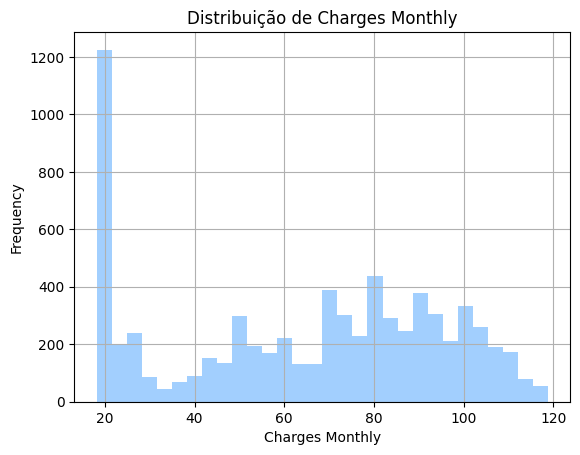

In [23]:
print(" 📚 Histograma para visualizar a distribuição de Charges.Monthly.")
print()

# Usando um código hexadecimal para uma cor pastel
final_df['Charges_Monthly'].hist(bins=30, color='#A2CFFE') # Um tom de azul pastel
plt.title('Distribuição de Charges Monthly')
plt.xlabel('Charges Monthly')
plt.ylabel('Frequency')
plt.show()

📚 Verificando valores únicos em 'Churn' após a padronização.

Valores únicos em 'Churn': [0 1 '']

📚 Value counts for Churn:
Churn
0    5174
1    1869
      224
Name: count, dtype: int64

 📚 Distribuição de clientes por Churn.


📚 Verificando valores únicos em 'Churn' após pd.to_numeric(errors='coerce').
Valores únicos em 'Churn': [ 0.  1. nan]

📚 Value counts for Churn (numeric):
Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

📚 Calculated percentages for Churn:
Churn
0.0    73.463013
1.0    26.536987
Name: count, dtype: float64


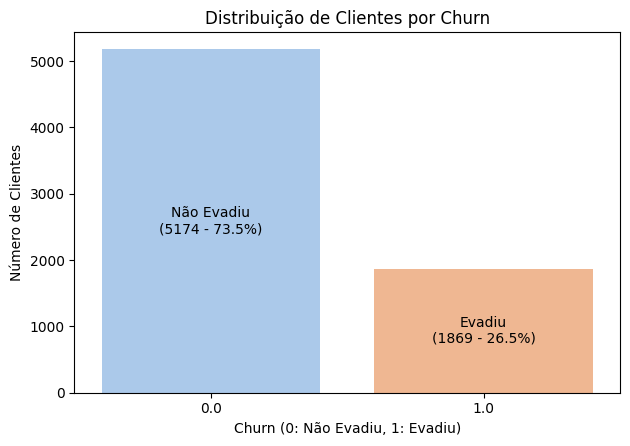

In [24]:
print("📚 Verificando valores únicos em 'Churn' após a padronização.")
unique_churn_values = final_df['Churn'].unique()
print()
print(f"Valores únicos em 'Churn': {unique_churn_values}")
print()

churn_counts = final_df['Churn'].value_counts(dropna=True)
print("📚 Value counts for Churn:")
print(churn_counts)
print()

print(" 📚 Distribuição de clientes por Churn.")
print()

final_df['Churn'] = final_df['Churn'].astype(str).replace({'Yes': 1, 'No': 0})

final_df['Churn'] = pd.to_numeric(final_df['Churn'], errors='coerce')

print("\n📚 Verificando valores únicos em 'Churn' após pd.to_numeric(errors='coerce').")
unique_churn_values_numeric = final_df['Churn'].unique()
print(f"Valores únicos em 'Churn': {unique_churn_values_numeric}")

churn_counts_numeric = final_df['Churn'].value_counts(dropna=True)

print("\n📚 Value counts for Churn (numeric):")
print(churn_counts_numeric)

churn_percentages_correct = churn_counts_numeric.apply(lambda x: x / churn_counts_numeric.sum() * 100)

print("\n📚 Calculated percentages for Churn:")
print(churn_percentages_correct)

df_plot = final_df[final_df['Churn'].isin([0, 1])].copy()

ax = sns.countplot(data=df_plot, x='Churn', hue='Churn', palette='pastel', legend=False)

plt.title('Distribuição de Clientes por Churn')
plt.xlabel('Churn (0: Não Evadiu, 1: Evadiu)')
plt.ylabel('Número de Clientes')


for i, p in enumerate(ax.patches):

    bar_center_x = p.get_x() + p.get_width() / 2

    churn_value = round(bar_center_x)


    if churn_value not in churn_counts_numeric.index:

        print(f"Warning: Unexpected churn_value {churn_value} encountered during annotation. Skipping annotation for this patch.")
        continue


    height = p.get_height()


    if churn_value == 0:
        label_text = 'Não Evadiu'
    else:
        label_text = 'Evadiu'


    count = churn_counts_numeric.get(churn_value, 0)
    percentage = churn_percentages_correct.get(churn_value, 0.0)

    text_to_display = f'{label_text}\n({count} - {percentage:.1f}%)'


    ax.annotate(text_to_display,
                xy=(bar_center_x, height / 2),
                xytext=(0, 0),
                textcoords="offset points",
                ha='center', va='center',
                fontsize=10,
                color='black')


plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

 📚 Distribuição de Churn por Contract - Tipo de Contrato.



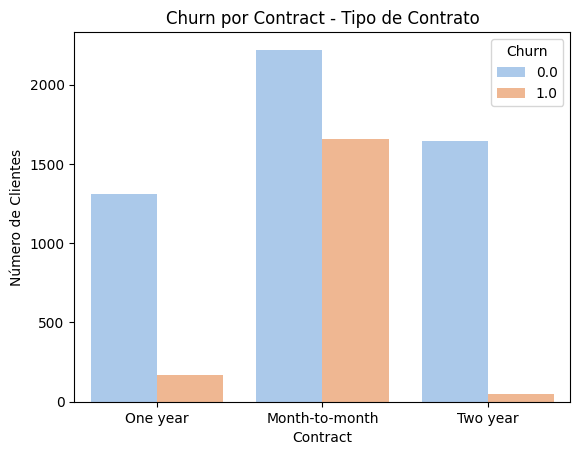

In [25]:
# Gráfico de barras para Churn por contrato
print(" 📚 Distribuição de Churn por Contract - Tipo de Contrato.")
print()
sns.countplot(data=final_df, x='Contract', hue='Churn', palette='pastel')
plt.title('Churn por Contract - Tipo de Contrato')
plt.xlabel('Contract') # Adicionando rótulo claro para o eixo x
plt.ylabel('Número de Clientes') # Adicionando rótulo claro para o eixo y
plt.show()

 📚 Distribuição dos valores de cobranças mensais por Churn.



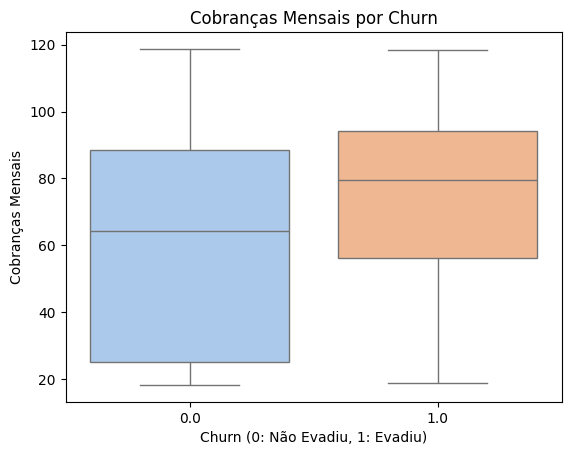

In [26]:
# Distribuição dos valores de cobranças mensais por Churn
print(" 📚 Distribuição dos valores de cobranças mensais por Churn.")
print()

sns.boxplot(data=final_df, x='Churn', y='Charges_Monthly', hue='Churn', palette='pastel', legend=False)
plt.title('Cobranças Mensais por Churn')
plt.xlabel('Churn (0: Não Evadiu, 1: Evadiu)')
plt.ylabel('Cobranças Mensais')
plt.show()

In [27]:
# Renomea colunas para maior clareza
print("📚 Renomeando colunas.")

# Defini um dicionário com o mapeamento de nomes antigos para novos
novos_nomes_colunas = {
    'Charges.Monthly': 'Charges_Monthly',
    'Charges.Total': 'Charges_Total'
    # Adicionar outros nomes aqui se necessário. Ex: 'OldName': 'NewName'
}

# Usa o método rename do pandas
final_df = final_df.rename(columns=novos_nomes_colunas)

print("📚 Colunas renomeadas com sucesso.")
print()

# Verificar os nomes das colunas após a renomeação
print("Nomes das colunas após renomeação:")
print(final_df.columns)

📚 Renomeando colunas.
📚 Colunas renomeadas com sucesso.

Nomes das colunas após renomeação:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total',
       'Contas_Diarias'],
      dtype='object')


 📚 Distribuição dos valores de cobranças totais por Churn.



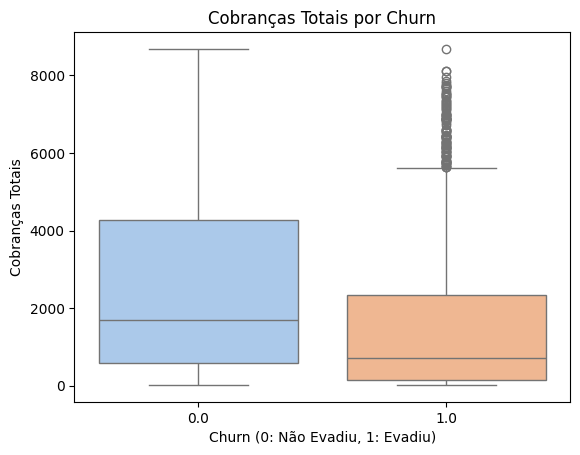

In [28]:
# Distribuição dos valores de cobranças totais por Churn
print(" 📚 Distribuição dos valores de cobranças totais por Churn.")
print()

sns.boxplot(data=final_df, x='Churn', y='Charges_Total', hue='Churn', palette='pastel', legend=False)
plt.title('Cobranças Totais por Churn')
plt.xlabel('Churn (0: Não Evadiu, 1: Evadiu)') # Adicionando rótulo claro
plt.ylabel('Cobranças Totais') # Adicionando rótulo claro
plt.show()

 📚 Distribuição de Churn por Tipo de Serviço de Internet. Como serviços específicos, 
    a exmplo: Internet ou suporte técnico, afetam a evasão.



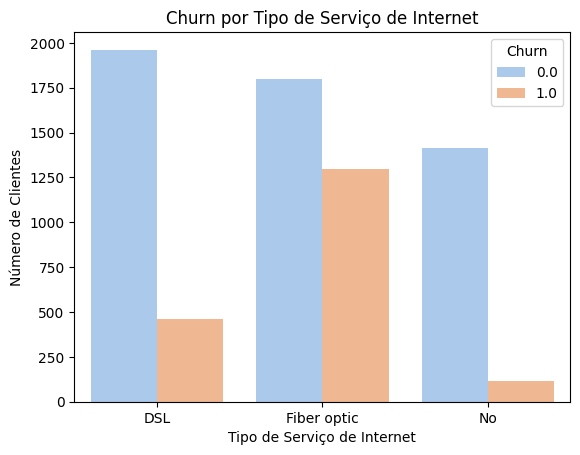

In [29]:
# Gráfico de barras para Churn por InternetService
print(" 📚 Distribuição de Churn por Tipo de Serviço de Internet. Como serviços específicos, \n    a exmplo: Internet ou suporte técnico, afetam a evasão.")
print()

sns.countplot(data=final_df, x='InternetService', hue='Churn', palette='pastel')
plt.title('Churn por Tipo de Serviço de Internet')
plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Número de Clientes')
plt.show()

📚 Visualizando a relação entre tempo de permanência (tenure) e Churn.



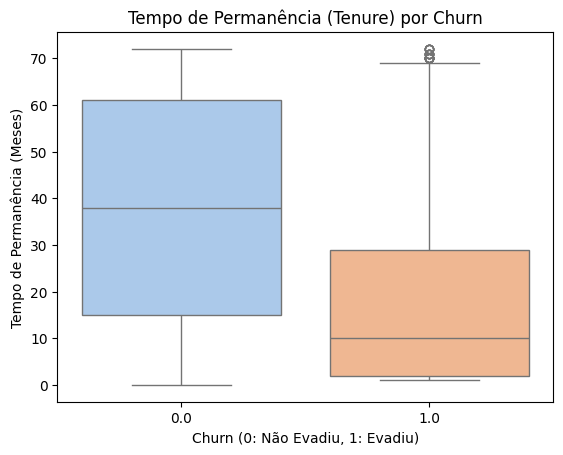

In [30]:
print("📚 Visualizando a relação entre tempo de permanência (tenure) e Churn.")
print()

sns.boxplot(data=final_df, x='Churn', y='tenure', hue='Churn', palette='pastel', legend=False)
plt.title('Tempo de Permanência (Tenure) por Churn')
plt.xlabel('Churn (0: Não Evadiu, 1: Evadiu)')
plt.ylabel('Tempo de Permanência (Meses)')
plt.show()

📚 Histograma da distribuição de tenure.



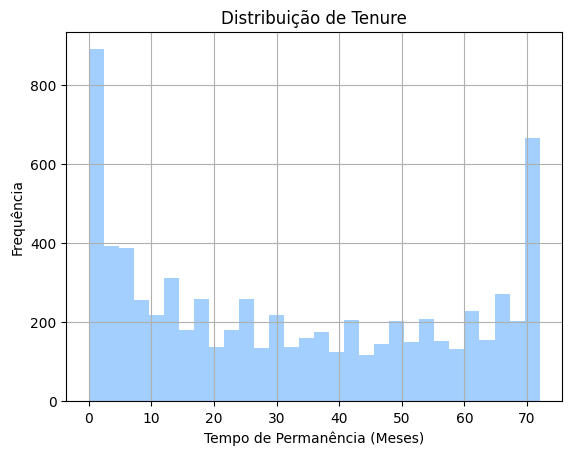

In [31]:
print("📚 Histograma da distribuição de tenure.")
print()

final_df['tenure'].hist(bins=30, color='#A2CFFE')
plt.title('Distribuição de Tenure')
plt.xlabel('Tempo de Permanência (Meses)')
plt.ylabel('Frequência')
plt.show()

In [32]:
print("📚 VISUALIZANDO A RELAÇÃO ENTRE SERVIÇOS ADICIONAIS E CHURN.")
print()

📚 VISUALIZANDO A RELAÇÃO ENTRE SERVIÇOS ADICIONAIS E CHURN.



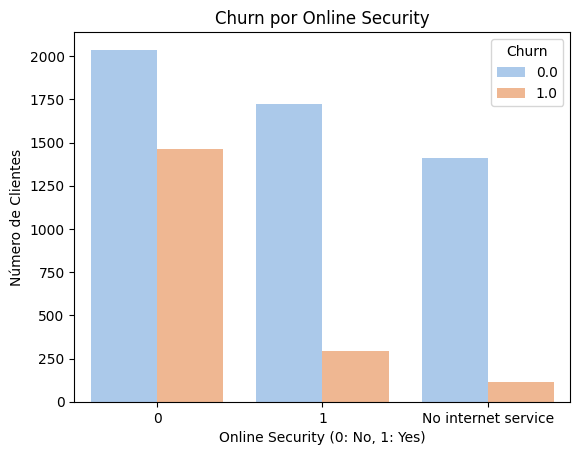

In [33]:
sns.countplot(data=final_df, x='OnlineSecurity', hue='Churn', palette='pastel')
plt.title('Churn por Online Security')
plt.xlabel('Online Security (0: No, 1: Yes)')
plt.ylabel('Número de Clientes')
plt.show()

> 🕵️ Considerações:<br>

>> Clientes que têm 'Online Security' (Valor 1): <br>
>> A barra azul (Não Evadiram) significativamente mais alta que a barra laranja (Evadiram). Isso sugere que clientes com o serviço de Segurança Online tendem a evadir menos.<br>

>> Clientes que não têm 'Online Security' (Valor 0): <br>
>> A barra laranja (Evadiram) mais próxima que a barra azul (Não Evadiram) em proporção ao total para essa categoria. Sugere uma taxa de evasão maior entre clientes sem Segurança Online.

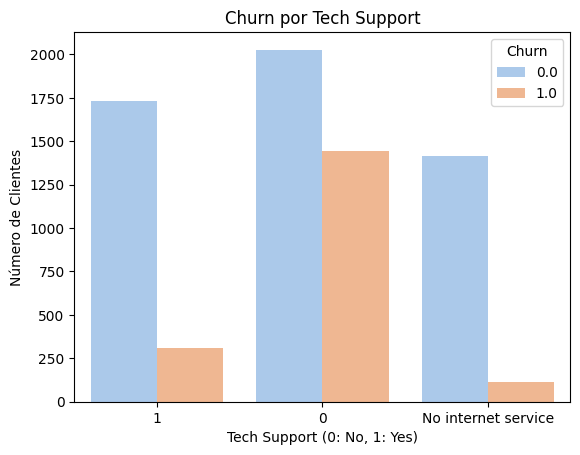

In [34]:
sns.countplot(data=final_df, x='TechSupport', hue='Churn', palette='pastel')
plt.title('Churn por Tech Support')
plt.xlabel('Tech Support (0: No, 1: Yes)')
plt.ylabel('Número de Clientes')
plt.show()

> 🕵️ Considerações:<br>

>> Clientes com Suporte Técnico tendem a evadir menos do que aqueles sem Suporte Técnico.<br>
>> Insight: <br>
>> Os gráficos sugerem que serviços adicionais como Online Security e Tech Support estão associados a uma menor taxa de evasão. Clientes que utilizam esses serviços podem sentir que estão recebendo mais valor da empresa, ou que seus problemas são mais facilmente resolvidos (no caso do Suporte Técnico), levando a uma maior satisfação e menor probabilidade de cancelamento. <br>
>> 🚀 Promover a assinatura desses serviços pode ser uma estratégia para melhorar a retenção de clientes.

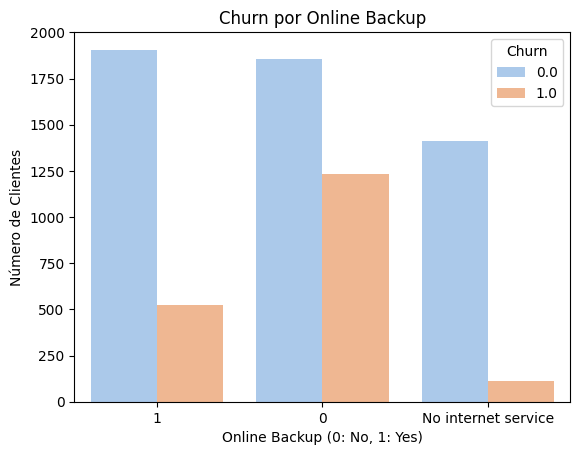

In [35]:
# Gráfico de barras para Churn por OnlineBackup com palette suave
sns.countplot(data=final_df, x='OnlineBackup', hue='Churn', palette='pastel')
plt.title('Churn por Online Backup')
plt.xlabel('Online Backup (0: No, 1: Yes)')
plt.ylabel('Número de Clientes')
plt.show()

> 🕵️ Considerações:<br>
>> Clientes que possuem Online Backup e Device Protection tendem a ter uma taxa de evasão menor em comparação com aqueles que não têm. Supondo que tais serviços de "segurança" e "proteção" estejam associados a uma maior retenção. <br>
>> Serviços relacionados à segurança e suporte (Online Security, Tech Support, Online Backup, Device Protection) mostram uma forte correlação com menor Churn.

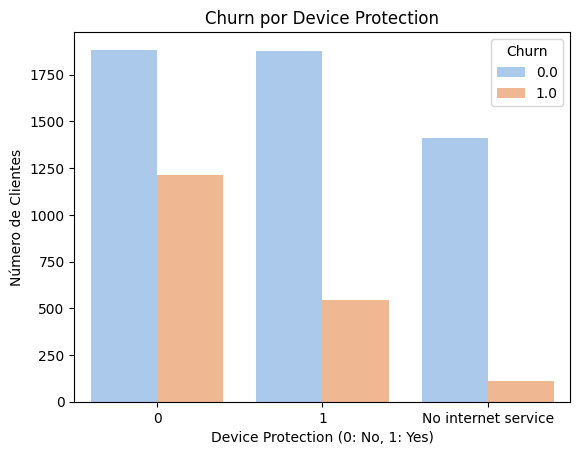

In [36]:
sns.countplot(data=final_df, x='DeviceProtection', hue='Churn', palette='pastel')
plt.title('Churn por Device Protection')
plt.xlabel('Device Protection (0: No, 1: Yes)')
plt.ylabel('Número de Clientes')
plt.show()

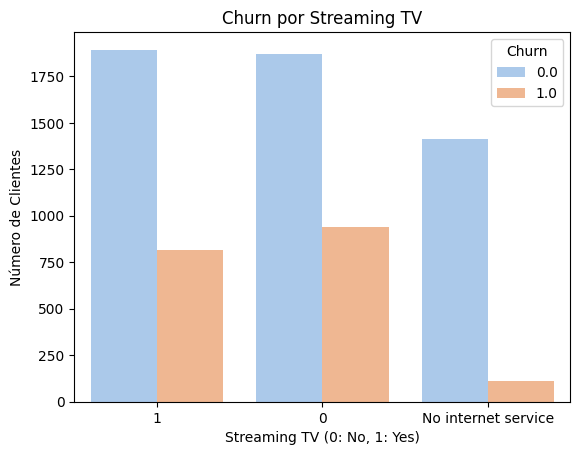

In [37]:
# Churn por StreamingTV
sns.countplot(data=final_df, x='StreamingTV', hue='Churn', palette='pastel')
plt.title('Churn por Streaming TV')
plt.xlabel('Streaming TV (0: No, 1: Yes)')
plt.ylabel('Número de Clientes')
plt.show()


> 🕵️ Considerações: <br>
>> Streaming TV e Streaming Movies:É possível que a diferença nas taxas de evasão entre quem tem e quem não tem esses serviços não seja tão acentuada quanto nos serviços de segurança/suporte. Às vezes, esses serviços são vistos mais como um "extra" e podem não ser tão determinantes na decisão de evadir quanto a segurança ou o suporte. No entanto, em alguns casos, eles podem contribuir para a satisfação geral e, consequentemente, para a retenção. Sumarizando os Insights sobre Serviços Adicionais:


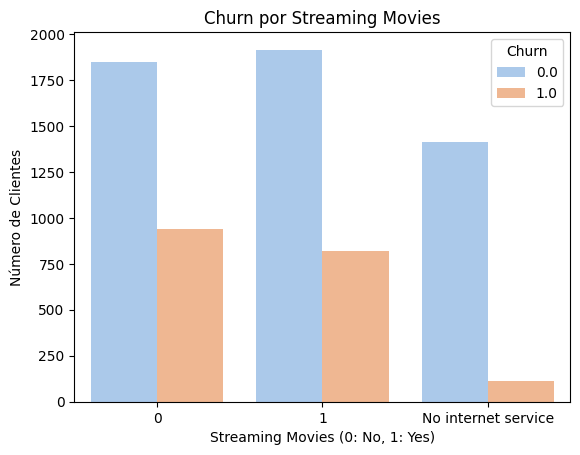

In [38]:
# Churn por StreamingMovies
sns.countplot(data=final_df, x='StreamingMovies', hue='Churn', palette='pastel')
plt.title('Churn por Streaming Movies')
plt.xlabel('Streaming Movies (0: No, 1: Yes)')
plt.ylabel('Número de Clientes')
plt.show()

📚 Visualizando a relação entre Churn e Método de Pagamento.



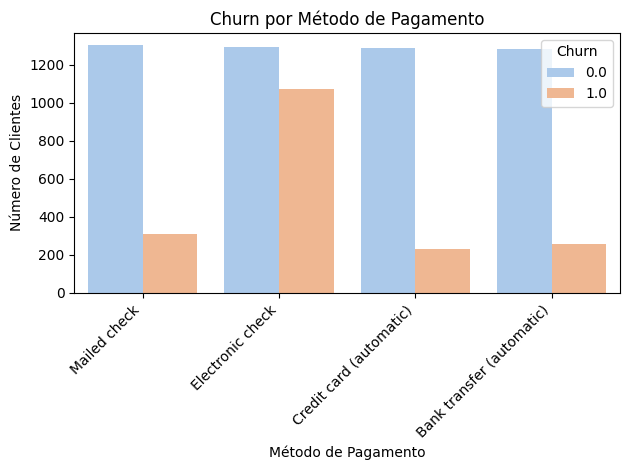

In [39]:
print("📚 Visualizando a relação entre Churn e Método de Pagamento.")
print()

sns.countplot(data=final_df, x='PaymentMethod', hue='Churn', palette='pastel')
plt.title('Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right') # Rotacionar os rótulos do eixo X para melhor visualização
plt.tight_layout() # Ajustar o layout para evitar sobreposição
plt.show()

📚 Criando Treemap para InternetService com taxa de Churn.



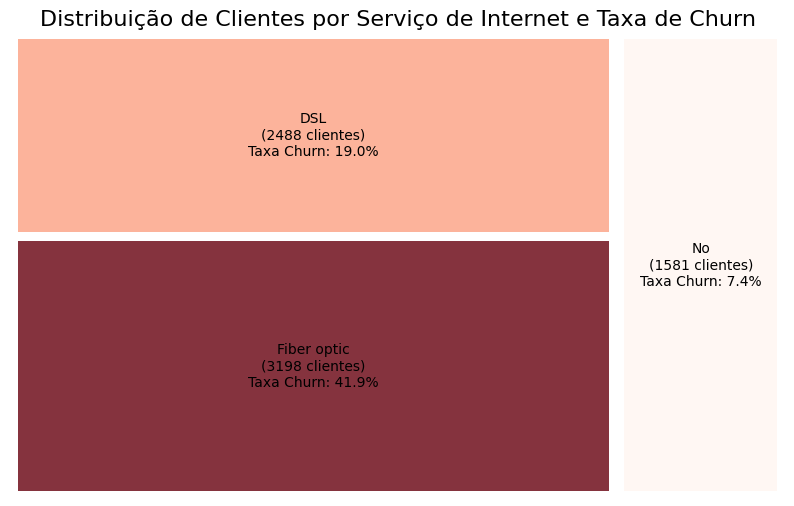

In [40]:
# Certifica que a coluna 'Churn' é numérica (0 ou 1) antes de agrupar
# Trata possíveis valores que não foram convertidos para 0 ou 1
# Usa errors='coerce' para transformar quaisquer valores que não sejam 'Yes' ou 'No' (após replace) em NaN
final_df['Churn'] = final_df['Churn'].replace({'Yes': 1, 'No': 0})
# Certifica que a coluna Churn é numérica, forçando a conversão.
# Qualquer valor que não seja 0 ou 1 após o replace se tornará NaN
final_df['Churn'] = pd.to_numeric(final_df['Churn'], errors='coerce')

# final_df.dropna(subset=['Churn'], inplace=True)

print("📚 Criando Treemap para InternetService com taxa de Churn.")
print()

# 1. Calcula a contagem de clientes para cada InternetService
internet_counts = final_df['InternetService'].value_counts().reset_index()
internet_counts.columns = ['InternetService', 'Count']

# 2. Calcula a taxa de Churn para cada InternetService
# Agrupa por InternetService e calcular a média de Churn (que é 1 para Evadiu)
# A coluna Churn agora é garantidamente numérica (0, 1, ou NaN se errors='coerce' foi usado e não dropna)
churn_rate_by_internet = final_df.groupby('InternetService')['Churn'].mean().reset_index()
churn_rate_by_internet.columns = ['InternetService', 'ChurnRate']

# 3. Combina os dados de contagem e taxa de Churn
treemap_data = pd.merge(internet_counts, churn_rate_by_internet, on='InternetService')

# 4. Prepara os rótulos para o treemap
# Incluir o nome do serviço, a contagem e a taxa de churn formatada
treemap_data['Labels'] = treemap_data.apply(
    lambda row: f"{row['InternetService']}\n({row['Count']} clientes)\nTaxa Churn: {row['ChurnRate']:.1%}", axis=1
)

# 5. Prepara as cores baseadas na taxa de Churn
# Utilizando um colormap (ex: 'viridis' ou 'Reds') para mapear a taxa de churn para uma cor
# Quanto maior a taxa de churn, mais intensa a cor (vermelho para Red, amarelo/verde para viridis)
cmap = plt.cm.Reds # Usando a paleta Reds: maior taxa de churn = mais vermelho
# Normaliza a taxa de churn para mapear no colormap (valores entre 0 e 1)
norm = plt.Normalize(vmin=treemap_data['ChurnRate'].min(), vmax=treemap_data['ChurnRate'].max())
colors = [cmap(norm(value)) for value in treemap_data['ChurnRate']]

# 6. Cria o Treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=treemap_data['Count'], # O tamanho de cada caixa é a contagem de clientes
              label=treemap_data['Labels'], # O rótulo para cada caixa
              color=colors, # As cores baseadas na taxa de churn
              alpha=.8, # Transparência
              pad=True) # Adiciona um pequeno espaçamento entre as caixas

plt.title('Distribuição de Clientes por Serviço de Internet e Taxa de Churn', fontsize=16)
plt.axis('off') # Oculta os eixos
plt.show()

📚 Calculando a Matriz de Correlação (excluindo customerID).



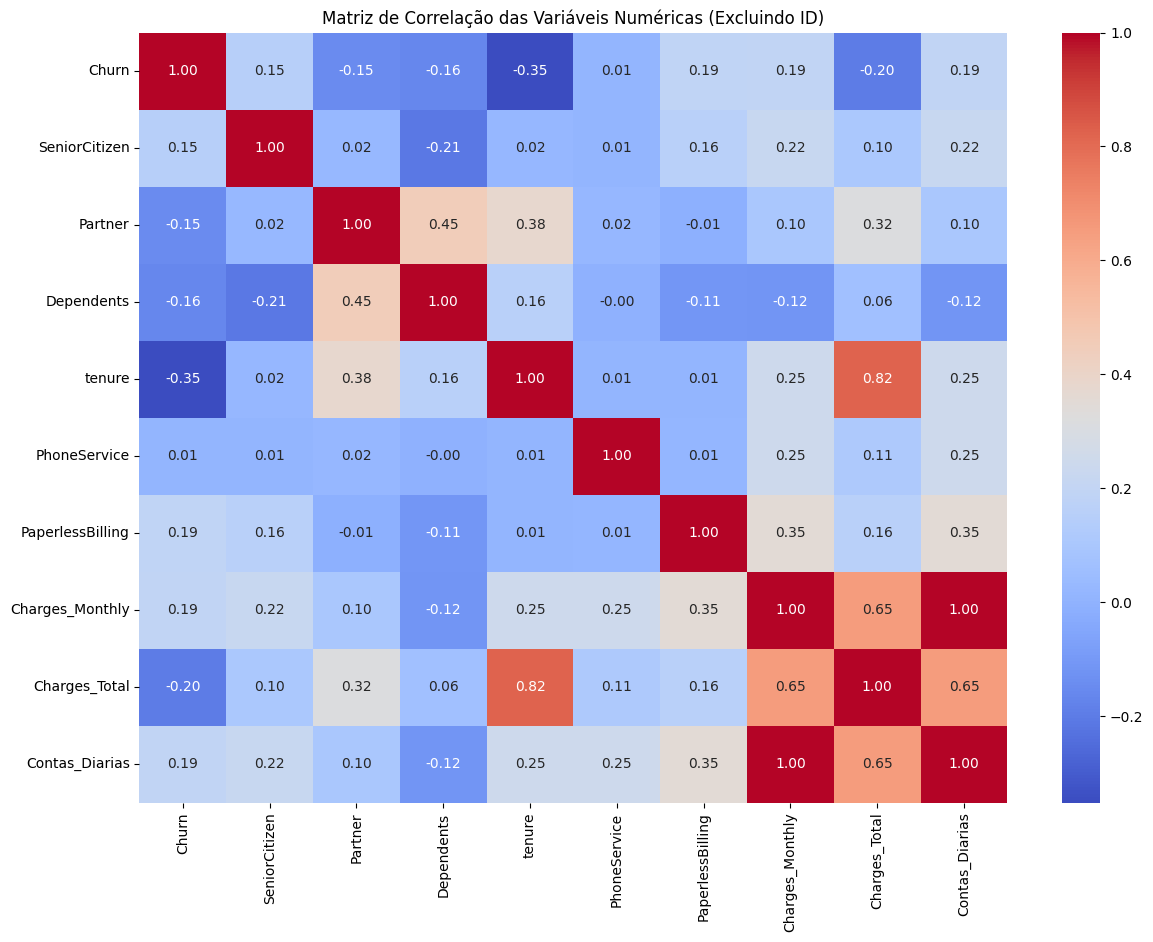


📚 Correlação das variáveis com Churn (excluindo customerID):
Churn               1.000000
Charges_Monthly     0.193356
Contas_Diarias      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
Partner            -0.150448
Dependents         -0.164221
Charges_Total      -0.199427
tenure             -0.352229
Name: Churn, dtype: float64

📚 Analisando a relação entre Conta Diária e Churn:
Correlação entre Contas_Diarias e Churn: 0.19

📚 Analisando a relação entre Quantidade de Serviços Contratados e Churn.
Nenhuma coluna de serviço adicional numérica encontrada para contar.


In [41]:
print("📚 Calculando a Matriz de Correlação (excluindo customerID).")
print()
# Os dados 'customerID' e 'Numero_Servicos_Adicionais'serão analisados posteriormente.
colunas_para_correlacao = final_df.select_dtypes(include=['number']).columns.tolist()
if 'customerID' in colunas_para_correlacao:
    colunas_para_correlacao.remove('customerID')
if 'Numero_Servicos_Adicionais' in colunas_para_correlacao:
     colunas_para_correlacao.remove('Numero_Servicos_Adicionais')


# Calcular a matriz de correlação apenas com as colunas numéricas relevantes
correlation_matrix = final_df[colunas_para_correlacao].corr()


# Visualizar a matriz de correlação usando um mapa de calor
plt.figure(figsize=(14, 10)) # Ajuste o tamanho conforme necessário para mais colunas
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas (Excluindo ID)')
plt.show()

print("\n📚 Correlação das variáveis com Churn (excluindo customerID):")

# Exibir a correlação de cada variável com Churn da matriz calculada
if 'Churn' in correlation_matrix.columns:
    print(correlation_matrix['Churn'].sort_values(ascending=False))
else:
    print("Coluna 'Churn' não encontrada na matriz de correlação calculada.")


print("\n📚 Analisando a relação entre Conta Diária e Churn:")

# A correlação direta já aparece na matriz de correlação exibida acima.
# Vamos destacar o valor específico, verificando se a coluna existe na matriz:
if 'Contas_Diarias' in correlation_matrix.columns and 'Churn' in correlation_matrix.index:
    print(f"Correlação entre Contas_Diarias e Churn: {correlation_matrix.loc['Churn', 'Contas_Diarias']:.2f}")
else:
    print("Colunas 'Contas_Diarias' ou 'Churn' não encontradas na matriz de correlação.")


print("\n📚 Analisando a relação entre Quantidade de Serviços Contratados e Churn.")

# Primeiro, criar uma coluna que conta o número de serviços adicionais
# Vamos considerar os serviços binários que você padronizou
servicos_adicionais_cols = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Verificar se as colunas existem e são numéricas antes de somar
servicos_para_contar = [col for col in servicos_adicionais_cols if col in final_df.columns and pd.api.types.is_numeric_dtype(final_df[col])]

if servicos_para_contar:
    # Criar a coluna 'Numero_Servicos_Adicionais' se ainda não existir
    if 'Numero_Servicos_Adicionais' not in final_df.columns:
         final_df['Numero_Servicos_Adicionais'] = final_df[servicos_para_contar].sum(axis=1)

    # Calcular a correlação entre o número de serviços e Churn
    correlacao_servicos_churn = final_df['Numero_Servicos_Adicionais'].corr(final_df['Churn'])

    print(f"Correlação entre Numero_Servicos_Adicionais e Churn: {correlacao_servicos_churn:.2f}")

    # Opcional: Visualizar a relação com um boxplot
    print("\n📚 Visualizando a relação entre Numero_Servicos_Adicionais e Churn (Boxplot).")
    sns.boxplot(data=final_df, x='Churn', y='Numero_Servicos_Adicionais')
    plt.title('Número de Serviços Adicionais por Churn')
    plt.xlabel('Churn (0: Não Evadiu, 1: Evadiu)')
    plt.ylabel('Número de Serviços Adicionais')
    plt.show()

else:
    print("Nenhuma coluna de serviço adicional numérica encontrada para contar.")

> 📚 Segmentação de Clientes

In [42]:
# Definindo o segmento de clientes idosos de alto valor
# Para 'Alto Valor', vamos considerar clientes cujo Charges_Total está acima do 3º quartil (75%)
# **Certifique-se de que 'Charges_Total' é o nome correto da coluna após a renomeação**
try:
    q3_charges_total = final_df['Charges_Total'].quantile(0.75)

    clientes_idosos_alto_valor = final_df[
        (final_df['SeniorCitizen'] == 1) &
        (final_df['Charges_Total'] > q3_charges_total)
    ]

    print("📚 Primeiras 5 linhas do segmento 'Clientes Idosos de Alto Valor':")
    print()
    print(clientes_idosos_alto_valor.head())
    print()

    print(f"\n📚 Número de clientes no segmento 'Clientes Idosos de Alto Valor': {len(clientes_idosos_alto_valor)}")
    print()

    print("\n📚 Estatísticas descritivas para o segmento 'Clientes Idosos de Alto Valor':")
    print()
    print(clientes_idosos_alto_valor.describe().T)
    print()

except KeyError as e:
    print(f"Erro: A coluna {e} não foi encontrada no DataFrame. Por favor, verifique os nomes das colunas.")
    print("Nomes das colunas disponíveis:")
    print(final_df.columns)

📚 Primeiras 5 linhas do segmento 'Clientes Idosos de Alto Valor':

     customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
6    0013-SMEOE    0.0  Female              1        1           0      71   
59   0100-DUVFC    0.0    Male              1        1           0      70   
87   0136-IFMYD    0.0    Male              1        1           0      69   
93   0147-ESWWR    0.0  Female              1        1           0      39   
113  0193-ESZXP    1.0  Female              1        1           0      58   

     PhoneService MultipleLines InternetService  ... DeviceProtection  \
6               1             0     Fiber optic  ...                1   
59              1             1     Fiber optic  ...                1   
87              1             1     Fiber optic  ...                1   
93              1             1     Fiber optic  ...                0   
113             1             0     Fiber optic  ...                0   

    TechSupport Streaming

> 📚 Compreendendo os dados:<br>

>> Confirmação do Alto Valor e Longevidade:<br>

>> **tenure** (Tempo de Permanência):<br>
>> A média de 59.77 meses e o mínimo de 35 meses definitivamente confirmam que este segmento é composto por clientes fiéis e de longo prazo. Comparado à média geral de 32.3 meses, a longevidade é notável. <br>

>> **Charges_Monthly (Cobranças Mensais)**: <br>
>> A média de R$ 95.90 e o máximo de R$$ 95.90 e o máximo de R$ 117.45 realmente são significativamente maiores do que a média geral de R$ 64.72. Confirmando que esses clientes geram uma receita mensal maior. <br>

>> **Charges_Total (Cobranças Totais):** <br>
>> A média de R$$ 64.72. Atestando que esses clientes geram uma receita mensal maior. <br>

>> A média de R$ 5736.20 é um indicador fortíssimo do valor acumulado por esses clientes. É um valor substancial e demonstra a importância desse segmento para a receita total.<br>

>> 🔴 A Taxa de Churn:<br>

>> **Churn**: <br>
>> A média de 0.214286 (aproximadamente 21.4%) para o churn neste segmento é, de fato, um dado alarmante, especialmente considerando o alto valor desses clientes. Perder um cliente deste grupo tem um impacto financeiro e estratégico muito maior do que perder um cliente de baixo valor. Sendo um ponto crítico que a empresa precisa abordar.

>> Comportamento e Demografia para Segmentação Refinada:<br>

>> **Partner (Parceiro)**: <br>
>> A taxa de 69.3% possuindo parceiro é notavelmente maior do que a média geral de 48.4%. Sugerindo que as dinâmicas familiares (ou de relacionamento) podem ser um fator importante neste segmento e que podem influenciar as necessidades de serviços ou planos.


# 📈 Relatório Final: <br>Análise de Evasão de Clientes (Churn) na Telecom X BR



---



> Introdução



---



> A evasão de clientes, ou Churn, representa um desafio significativo para empresas de telecomunicações como a Telecom X BR. Clientes que deixam a empresa resultam em perda de receita e custos adicionais para aquisição de novos clientes.<br>

> Este relatório apresenta uma análise detalhada do dataset de clientes da Telecom X BR com o objetivo de:<br>

> * Compreender as características dos clientes que evadem.<br>
> * Identificar os principais fatores associados ao Churn.<br>
> * Gerar insights e recomendações para ajudar a Telecom X BR a reduzir sua taxa de evasão.<br>

> Através da extração, tratamento e análise exploratória dos dados, buscou-se desvendar padrões que permitam à empresa agir proativamente na retenção de seus clientes valiosos.<br>



---



> 📚 Limpeza e Tratamento de Dados (ETL)



---



> A qualidade dos dados é fundamental para uma análise precisa. <br>
> A etapa de Limpeza e Tratamento de Dados (parte do processo ETL - Extração, Transformação e Carga) envolveu as seguintes fases:

> Extração

> Os dados foram extraídos de uma fonte JSON (TelecomX_Data.json) disponível em um repositório GitHub. <br>
> O dicionário de dados (TelecomX_dicionario.md) também foi acessado para auxiliar na compreensão das variáveis.

> Estruturação (Desaninhamento)

> Os dados brutos continham informações aninhadas em colunas como '`customer`', '`phone`', '`internet`' e '`account`'.<br>
> Para facilitar a análise tabular, utilizou-se a função `pd.json_normalize` do Pandas para desaninhar essas estruturas, transformando as chaves internas em novas colunas no DataFrame principal (`final_df`). <br>
> A coluna '`customerID`' e a variável alvo '`Churn`' foram mantidas e concatenadas ao DataFrame desaninhado.

> Limpeza e Padronização

> Diversas etapas de limpeza e padronização foram realizadas:

> Verificação e Correção de Tipos de Dados:<br>
> Colunas que deveriam ser numéricas, como 'Charges.Monthly' e 'Charges.Total', foram verificadas e convertidas para o tipo float, tratando possíveis caracteres não numéricos ou formatos incorretos (como vírgulas).<br>

> Tratamento de Valores Ausentes: <br>
> Foi verificado que, após o desaninhamento, a coluna 'Charges.Total' continha valores vazios que foram identificados como não numéricos durante a tentativa de conversão. Esses valores foram substituídos pela média da coluna após a conversão correta para numérico.<br>

> Tratamento de Espaços em Branco:<br>
> Espaços em branco no início ou no fim de valores em colunas de texto (object) foram removidos para garantir consistência.<br>

> Criação de Novas Variáveis: <br>
> Uma nova coluna, 'Contas_Diarias', foi criada dividindo 'Charges_Monthly' por 30 (assumindo 30 dias por mês) para analisar o custo diário para o cliente.<br>

> Padronização de Variáveis Binárias: <br>
> Colunas com valores 'Yes'/'No' foram padronizadas para 1/0, facilitando análises quantitativas e a preparação para modelagem.<br>

> Renomeação de Colunas:<br>
> Nomes de colunas como 'Charges.Monthly' e 'Charges.Total' foram renomeados para 'Charges_Monthly' e 'Charges_Total' para maior clareza e usabilidade.

# 📊 Análise Exploratória de Dados (EDA)

> A Análise Exploratória de Dados permitiu visualizar a distribuição das variáveis e identificar padrões importantes relacionados ao Churn.

### Estatísticas Descritivas

> A análise das estatísticas descritivas das colunas numéricas forneceu um resumo rápido da distribuição central, dispersão e alcance dos dados, como:<br>
 * O tempo médio de permanência (tenure),
 * Os valores médios de cobranças mensais e totais (Charges_Monthly, Charges_Total), e
 * A proporção de clientes idosos (SeniorCitizen).

### Distribuição das Variáveis

> Visualizações gráficas revelaram insights sobre a distribuição de variáveis chave e sua relação com o Churn:<br>

> * Distribuição de Cobranças Mensais (Charges_Monthly): <br>
> O histograma de Charges_Monthly mostrou a distribuição dos valores mensais cobrados.

> * Distribuição de Churn: <br>
  O gráfico de barras de Churn mostrou a proporção de clientes que evadiram vs. os que não evadiram, indicando a taxa de evasão geral no dataset.<br>

> * Churn por Características Demográficas e de Conta:<br>
  Gráficos como Churn por Gênero, Churn por Idoso (SeniorCitizen), Churn por Tipo de Contrato (Contract) e Churn por Método de Pagamento (PaymentMethod) destacaram como diferentes categorias nesses atributos influenciam a taxa de evasão. Notavelmente, clientes com contratos mensais e que utilizam cheque eletrônico parecem ter taxas de evasão mais altas.

> * Churn por Encargos: <br>
  Boxplots de Cobranças Mensais e Totais por Churn mostraram as distribuições desses valores para clientes que evadiram e não evadiram. <br>Clientes que evadiram podem apresentar distribuições diferentes de cobranças em comparação com os clientes que permaneceram.<br>

> * Relação entre Tempo de Permanência (tenure) e Churn: <br>
  O boxplot de tenure por Churn indicou a distribuição do tempo de permanência para clientes que evadiram vs. os que não evadiram.<br>

> * Relação entre Serviços Adicionais e Churn: <br>
  Gráficos de barras para Churn por serviços como OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection, StreamingTV e StreamingMovies revelaram o impacto desses serviços na probabilidade de evasão.<br>
  Clientes com serviços de segurança e suporte parecem evadir menos.

### Análise de Correlação

> A matriz de correlação das variáveis numéricas e a análise focada na correlação com Churn forneceram insights quantitativos sobre as relações lineares:<br>

 * Mapa de Calor da Correlação: <br>
   Visualização das correlações par a par entre todas as variáveis numéricas.<br>

 * Correlação com Churn:<br>
   Análise dos valores de correlação de cada variável com a variável alvo Churn. <br> As variáveis com os maiores valores absolutos de correlação são as mais fortemente associadas ao Churn.<br>

 * Relação Contas_Diarias vs. Churn: <br>
   A correlação entre Contas_Diarias e Churn foi analisada, mostrando que a medida que o custo diário aumenta, a probabilidade de Churn tende a aumentar (relação similar a Charges_Monthly).<br>

 * Relação Quantidade de Serviços Adicionais vs. Churn: <br>
   A contagem de serviços adicionais contratados (Numero_Servicos_Adicionais) foi correlacionada com Churn.

# 🤔 Conclusões e Insights

> A análise exploratória e de correlação revelou padrões significativos relacionados à evasão de clientes:<br><br>

>>⏳Tempo de Permanência é Crítico: Clientes com menor tempo de permanência (tenure) são significativamente mais propensos a evadir. A retenção nos primeiros meses é fundamental.<br><br>
>>📑Tipo de Contrato: Clientes com contratos mensais apresentam uma taxa de evasão muito maior em comparação com aqueles com contratos de um ou dois anos.<br><br>
>>💰Método de Pagamento e Conveniência: Métodos de pagamento menos convenientes, como cheque eletrônico, estão associados a uma maior taxa de evasão. Pagamentos automáticos (transferência bancária, cartão de crédito) indicam maior estabilidade e menor churn.<br><br>
>>📌Serviços Adicionais Agem Como Retentores: Clientes que assinam serviços adicionais, especialmente os relacionados à segurança (OnlineSecurity, OnlineBackup, DeviceProtection) e suporte (TechSupport), tendem a ter uma taxa de evasão consideravelmente menor. O número total de serviços adicionais também está negativamente correlacionado com o Churn.<br><br>
>>📉Custos Podem Influenciar: Embora a correlação possa não ser extremamente alta, encargos mensais mais altos (Charges_Monthly e Contas_Diarias) podem estar associados a uma probabilidade um pouco maior de Churn.<br><br>
>>📊Demografia: Clientes idosos (SeniorCitizen) podem apresentar uma tendência ligeiramente maior à evasão.<br><br>
Em suma, os clientes mais propensos a evadir tendem a ser novos clientes (baixo tenure), com contrato mensal, utilizando cheque eletrônico como método de pagamento e com poucos ou nenhum serviço adicional de segurança ou suporte.

# 💡 Recomendações

> Com base nos insights obtidos, as seguintes recomendações podem ajudar a Telecom X BR a reduzir a evasão de clientes:<br><br>

>> *Focar na Retenção de Novos Clientes*: <br> Implementar programas de engajamento e suporte intensivos nos primeiros meses de serviço para aumentar a satisfação e o tempo de permanência inicial.<br><br>
>> *Incentivar Contratos Mais Longos*: <br> Oferecer benefícios, descontos ou pacotes especiais para clientes que optarem por contratos de um ou dois anos em vez de contratos mensais.<br><br>
>> *Promover Métodos de Pagamento Automáticos*:<br> Educar e incentivar os clientes a optarem por transferências bancárias ou cartões de crédito automáticos, destacando a conveniência e segurança. Considerar a melhoria ou a reavaliação do processo de pagamento por cheque eletrônico se ele for um ponto de atrito.<br><br>
>> *Promover Serviços Adicionais* (Especialmente Segurança e Suporte):<br> Desenvolver campanhas de marketing que destaquem o valor e os benefícios de serviços como OnlineSecurity, TechSupport, OnlineBackup e DeviceProtection. Considerar oferecer pacotes iniciais com alguns desses serviços incluídos para aumentar a adesão.<br><br>
>> *Monitorar Clientes de Alto Custo Mensal*: <br> Implementar um acompanhamento proativo para clientes com encargos mensais mais altos, talvez oferecendo revisões de plano ou benefícios adicionais para garantir que percebam o valor do serviço.<br><br>
>> *Atenção aos Clientes Idosos*: Desenvolver canais de suporte ou programas específicos para clientes idosos, garantindo que suas necessidades sejam atendidas e que se sintam confortáveis com os serviços.<br><br>
Ao focar nessas áreas, a Telecom X BR pode criar estratégias de retenção mais eficazes, reduzir a taxa de evasão e aumentar o valor do tempo de vida do cliente.